In [2]:
import mercator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
data = joblib.load("../../../1_ppi_networks/large_ppi.sav")
g = data['network']
nodes = data['nodes']
edges = []
for e in g.iter_edges():
    edges.append(e)

edge_df = pd.DataFrame(edges)
edge_df.columns = ['source', 'target']
edge_df['source'] = edge_df['source'].apply(lambda x: nodes[x])
edge_df['target'] = edge_df['target'].apply(lambda x: nodes[x])
edge_df.to_csv('edges.tsv', sep='\t', index=False)

In [2]:
#mercator.embed('edges.tsv')
mercator.embed('edges_GC.edge')

In [3]:
name = 'edges_GC'
edge= pd.read_csv(name+'.edge',comment='#',header=None,sep='\s+',index_col= None)[[0,1]]
edge.columns = 'source target'.split()
df = pd.read_csv(name+'.inf_coord',comment='#',header=None,sep='\s+',index_col=0)
df.columns = 'k theta r'.split()
df = df.drop('k', axis=1)
df.to_csv('mercator_features.csv', index=True)
df['x'] = df['r']*np.cos(df['theta'])
df['y'] = df['r']*np.sin(df['theta'])
ppi_df = pd.read_csv("../../ppi_df.csv", index_col=0)
df = pd.concat([ppi_df, df], axis=1)

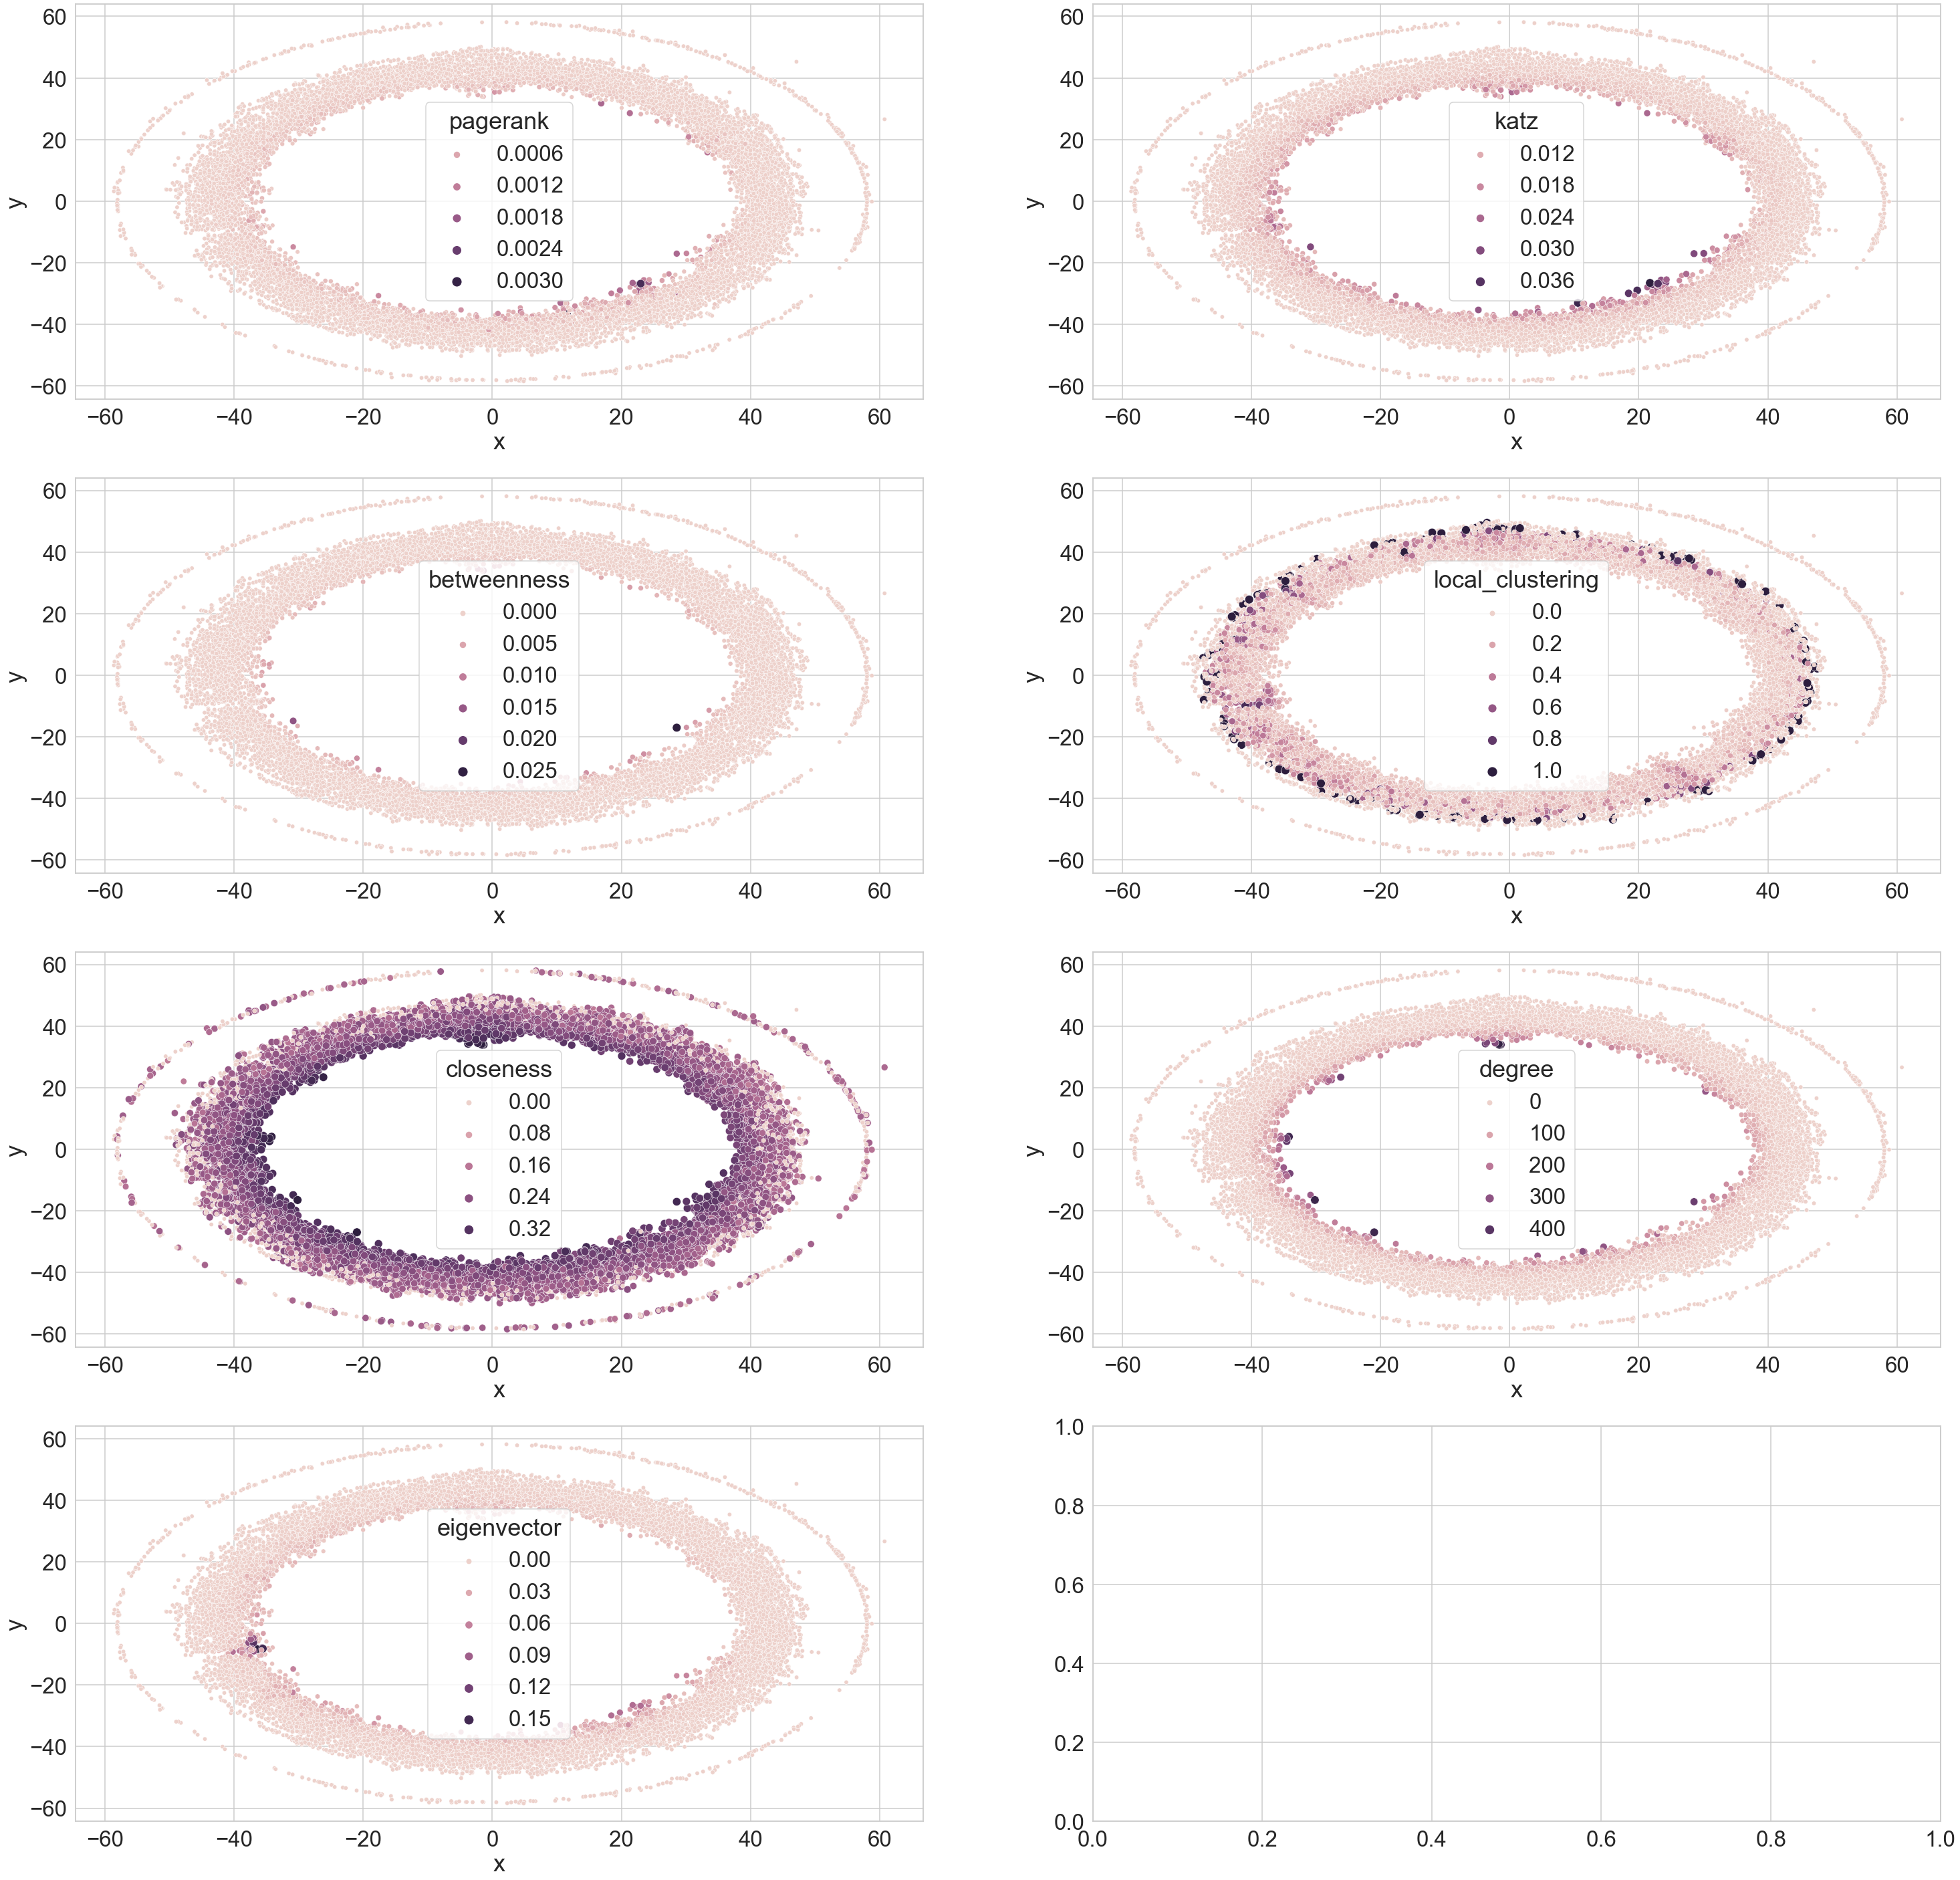

In [10]:
sns.set("talk", font_scale=2)
sns.set_style("whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(50, 50))
i = 0
j = 0
for col in df.columns:
    if col not in ['x', 'y', 'r', 'theta', 'r_mercator', 't_mercator']:
        sns.scatterplot(data=df, x='x', y='y', ax=axes[i, j], hue=col, size=col)
        i += 1
        if i == 4:
            i = 0
            j = j + 1

In [5]:
df.sort_values('eigenvector', ascending=False)

,pagerank,betweenness,closeness,eigenvector,katz,local_clustering,degree,t_mercator,r_mercator,theta,r,x,y
RPS6,0.000527,0.000138,0.240265,0.164021,0.023872,0.346126,12,3.36705,37.4736,3.36705,37.4736,-36.525217,-8.377304
RPS8,0.000495,0.001034,0.275584,0.151093,0.021404,0.200072,103,3.36881,36.4781,3.36881,36.4781,-35.540504,-8.217322
RPSA,0.000471,0.000842,0.274224,0.142199,0.019886,0.261146,52,3.36174,37.3854,3.36174,37.3854,-36.483114,-8.163977
RPS4X,0.000480,0.000124,0.242537,0.136438,0.020893,0.394954,20,3.30939,37.5136,3.30939,37.5136,-36.986722,-6.265185
RPS3,0.000437,0.000795,0.277354,0.134066,0.022343,0.273154,31,3.36473,37.1985,3.36473,37.1985,-36.276274,-8.231666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
C22orf31,0.000014,0.000000,0.234057,0.000000,0.006267,0.333333,3,4.30622,46.2400,4.30622,46.2400,-18.269096,-42.477968
C17orf82,0.000014,0.000000,0.230755,0.000000,0.006267,0.000000,2,5.77124,47.1308,5.77124,47.1308,41.088311,-23.088157
FMR1NB,0.000014,0.000000,0.231270,0.000000,0.006267,0.133333,10,3.29504,43.3737,3.29504,43.3737,-42.864061,-6.629491
RASL10B,0.000014,0.000000,0.263292,0.000000,0.006267,0.028571,15,4.00704,42.5754,4.00704,42.5754,-27.601614,-32.416286


In [10]:
features_combined = pd.read_csv('../../features_DRH.csv', index_col=0)
features_combined['Outcome'] = features_combined['Outcome'].replace({'Weak': 'Effect', 'Strong': 'Effect'})
targets = pd.read_csv('../../ppi_features_DRH Target.csv', index_col=0)['Target']

targets_outcomes = pd.concat([targets, features_combined['Outcome']], axis=1)
targets_outcomes

,Target,Outcome
BRD-K76022557,"HTR2A, HTR1A, ADRA2C, DRD3, HTR1B, DRD2, CALY,...",No-Effect
BRD-K75516118,"PDE4D, PDE4B, PDE5A, PDE4C, PDE4A",No-Effect
BRD-K62353271,"GABBR2, GABBR1",No-Effect
BRD-K65856711,"PDE4D, PDE4B",No-Effect
BRD-K89787693,TACR1,No-Effect
...,...,...
BRD-A00077618,PRKG1,No-Effect
BRD-A60594020,"DRD3, DRD2",No-Effect
BRD-A07232941,"MTNR1B, MTNR1A",No-Effect
BRD-K09291936,TOP1,No-Effect
